In [1]:
import pandas as pd
df = pd.read_csv('survey_data_updated 5.csv')

In [4]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
2,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
3,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Written Tutorial...,...,25.0,10.0,0.0,15.0,0.0,0.0,Appropriate in length,Easy,NaN,8.0
4,12,I am a developer by profession,45-54 years old,"Employed, full-time",In-person,Apples,Hobby;School or academic work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Books / Physical media;School (i.e., Universit...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN


In [6]:
df['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                                                                                291
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                                                         240
HTML/CSS;JavaScript;PHP;SQL                                                                                                   196
C#;HTML/CSS;JavaScript;SQL                                                                                                    152
HTML/CSS;JavaScript;SQL;TypeScript                                                                                            131
                                                                                                                             ... 
Go;HTML/CSS;JavaScript;PHP;Python;TypeScript;VBA                                                                                1
C#;HTML/CSS;JavaScript;PowerShell;Python                           

In [5]:
# Faqat kerakli ustunlar
df = df[[
    "LanguageHaveWorkedWith", "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith", "WebframeHaveWorkedWith",
    "LanguageWantToWorkWith", "DatabaseWantToWorkWith", "PlatformWantToWorkWith", "WebframeWantToWorkWith",
    "Age", "Country", "EdLevel"
]].dropna()

# Split va explode qilinadigan ustunlar
cols_to_explode = [
    "LanguageHaveWorkedWith", "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith", "WebframeHaveWorkedWith",
    "LanguageWantToWorkWith", "DatabaseWantToWorkWith", "PlatformWantToWorkWith", "WebframeWantToWorkWith"
]

exploded_dfs = []

for col in cols_to_explode:
    temp = df.copy()
    temp[col] = temp[col].str.split(';')
    temp = temp.explode(col)
    exploded_dfs.append(temp)


In [6]:
final_df = pd.concat(exploded_dfs, ignore_index=True)

# Null qiymatlarni tashlab yuborish va indexni reset qilish
final_df = final_df.dropna().reset_index(drop=True)
final_df




,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,LanguageWantToWorkWith,DatabaseWantToWorkWith,PlatformWantToWorkWith,WebframeWantToWorkWith,Age,Country,EdLevel
0,Bash/Shell (all shells),Dynamodb;MongoDB;PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Express;Htmx;Node.js;React;Remix,35-44 years old,United Kingdom of Great Britain and Northern I...,"Bachelor's degree (B.A., B.S., B.Eng., etc.)"
1,Go,Dynamodb;MongoDB;PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Express;Htmx;Node.js;React;Remix,35-44 years old,United Kingdom of Great Britain and Northern I...,"Bachelor's degree (B.A., B.S., B.Eng., etc.)"
2,HTML/CSS,Dynamodb;MongoDB;PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Express;Htmx;Node.js;React;Remix,35-44 years old,United Kingdom of Great Britain and Northern I...,"Bachelor's degree (B.A., B.S., B.Eng., etc.)"
3,Java,Dynamodb;MongoDB;PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Express;Htmx;Node.js;React;Remix,35-44 years old,United Kingdom of Great Britain and Northern I...,"Bachelor's degree (B.A., B.S., B.Eng., etc.)"
4,JavaScript,Dynamodb;MongoDB;PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Express;Htmx;Node.js;React;Remix,35-44 years old,United Kingdom of Great Britain and Northern I...,"Bachelor's degree (B.A., B.S., B.Eng., etc.)"
...,...,...,...,...,...,...,...,...,...,...,...
606692,Bash/Shell (all shells);C;C#;C++;Delphi;Groovy...,Couch DB;H2;Microsoft SQL Server;MySQL;Oracle;...,Microsoft Azure,Angular;AngularJS;ASP.NET;ASP.NET CORE;Drupal;...,Bash/Shell (all shells);C#;Go;HTML/CSS;Java;Ja...,Elasticsearch;PostgreSQL;Redis,Amazon Web Services (AWS);Firebase;Microsoft A...,Angular,45-54 years old,Belgium,"Bachelor's degree (B.A., B.S., B.Eng., etc.)"
606693,Bash/Shell (all shells);C;C#;C++;Delphi;Groovy...,Couch DB;H2;Microsoft SQL Server;MySQL;Oracle;...,Microsoft Azure,Angular;AngularJS;ASP.NET;ASP.NET CORE;Drupal;...,Bash/Shell (all shells);C#;Go;HTML/CSS;Java;Ja...,Elasticsearch;PostgreSQL;Redis,Amazon Web Services (AWS);Firebase;Microsoft A...,ASP.NET,45-54 years old,Belgium,"Bachelor's degree (B.A., B.S., B.Eng., etc.)"
606694,Bash/Shell (all shells);C;C#;C++;Delphi;Groovy...,Couch DB;H2;Microsoft SQL Server;MySQL;Oracle;...,Microsoft Azure,Angular;AngularJS;ASP.NET;ASP.NET CORE;Drupal;...,Bash/Shell (all shells);C#;Go;HTML/CSS;Java;Ja...,Elasticsearch;PostgreSQL;Redis,Amazon Web Services (AWS);Firebase;Microsoft A...,ASP.NET CORE,45-54 years old,Belgium,"Bachelor's degree (B.A., B.S., B.Eng., etc.)"
606695,Bash/Shell (all shells);C;C#;C++;Delphi;Groovy...,Couch DB;H2;Microsoft SQL Server;MySQL;Oracle;...,Microsoft Azure,Angular;AngularJS;ASP.NET;ASP.NET CORE;Drupal;...,Bash/Shell (all shells);C#;Go;HTML/CSS;Java;Ja...,Elasticsearch;PostgreSQL;Redis,Amazon Web Services (AWS);Firebase;Microsoft A...,Node.js,45-54 years old,Belgium,"Bachelor's degree (B.A., B.S., B.Eng., etc.)"


In [7]:
final_df.to_csv("Only_requarements.csv", index=False)

In [ ]:
import pandas as pd

# 1️⃣ Kerakli ustunlar
use_cols = [
    "LanguageHaveWorkedWith", "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith", "WebframeHaveWorkedWith",
    "LanguageWantToWorkWith", "DatabaseWantToWorkWith", "PlatformWantToWorkWith", "WebframeWantToWorkWith",
    "Age", "Country", "EdLevel"
]

# 2️⃣ CSV faylni o'qish
df = pd.read_csv("survey_data_updated 5.csv")

# 3️⃣ Explode qilish funksiyasi
def explode_columns(df, cols_to_explode):
    df_exploded = df.copy()
    for col in cols_to_explode:
        df_exploded[col] = df_exploded[col].dropna().str.split(";")
        df_exploded = df_exploded.explode(col)
    df_exploded = df_exploded.dropna().reset_index(drop=True)
    return df_exploded

# 4️⃣ List tarzidagi ustunlar
cols_to_explode = [
    "LanguageHaveWorkedWith", "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith", "WebframeHaveWorkedWith",
    "LanguageWantToWorkWith", "DatabaseWantToWorkWith", "PlatformWantToWorkWith", "WebframeWantToWorkWith"
]


# 5️⃣ Natijani hosil qilish
df_cleaned = explode_columns(df, cols_to_explode)

# 6️⃣ CSVga saqlash
df_cleaned.to_csv("survey_data_cleaned.csv", index=False)

print("Malumotlar tozalandi, split qilindi va bitta CSVda saqlandi!")

In [8]:
import pandas as pd

# 1️⃣ Kerakli ustunlar
use_cols = [
    "LanguageHaveWorkedWith", "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith", "WebframeHaveWorkedWith",
    "LanguageWantToWorkWith", "DatabaseWantToWorkWith", "PlatformWantToWorkWith", "WebframeWantToWorkWith",
    "Age", "Country", "EdLevel"
]

# 2️⃣ CSV faylni o'qish
df = pd.read_csv("survey_data_updated 5.csv")

# 3️⃣ Explode qilish funksiyasi
def explode_columns(df, cols_to_explode):
    df_exploded = df.copy()
    for col in cols_to_explode:
        df_exploded[col] = df_exploded[col].str.split(";")
        df_exploded = df_exploded.explode(col)
    df_exploded = df_exploded.dropna().reset_index(drop=True)
    return df_exploded

# 4️⃣ List tarzidagi ustunlar
cols_to_explode = [
    "LanguageHaveWorkedWith", "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith", "WebframeHaveWorkedWith",
    "LanguageWantToWorkWith", "DatabaseWantToWorkWith", "PlatformWantToWorkWith", "WebframeWantToWorkWith"
]
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
2,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
3,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Written Tutorial...,...,25.0,10.0,0.0,15.0,0.0,0.0,Appropriate in length,Easy,NaN,8.0
4,12,I am a developer by profession,45-54 years old,"Employed, full-time",In-person,Apples,Hobby;School or academic work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Books / Physical media;School (i.e., Universit...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18840,65307,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,I don't code outside of work,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Books;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18841,65327,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Schoo...,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18842,65352,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...","Hybrid (some remote, some in-person)",Apples,Bootstrapping a business;Professional developm...,Some college/university study without earning ...,Books / Physical media;On the job training;Sch...,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,8.0
18843,65402,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",Colleague;On the job training;Other online res...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:

# 5️⃣ Natijani hosil qilish
df_cleaned = explode_columns(df, cols_to_explode)

# 6️⃣ CSVga saqlash
df_cleaned.to_csv("survey_data_cleaned.csv", index=False)

print("Malumotlar tozalandi, split qilindi va bitta CSVda saqlandi!")


KeyboardInterrupt: 

In [15]:
# Kerakli kutubxonalarni import qilish
import pandas as pd
import matplotlib.pyplot as plt

# Excel faylini o'qish
file_path = "../Module_1_Data_Collection/popular-languages.csv"
df = pd.read_csv(file_path)

# Ma'lumotni tekshirish
df



,Language,Average Salary
0,Python,114383
1,Java,101013
2,R,92037
3,Javascript,110981
4,Swift,130801
5,C++,113865
6,C#,88726
7,PHP,84727
8,SQL,84793
9,Go,94082


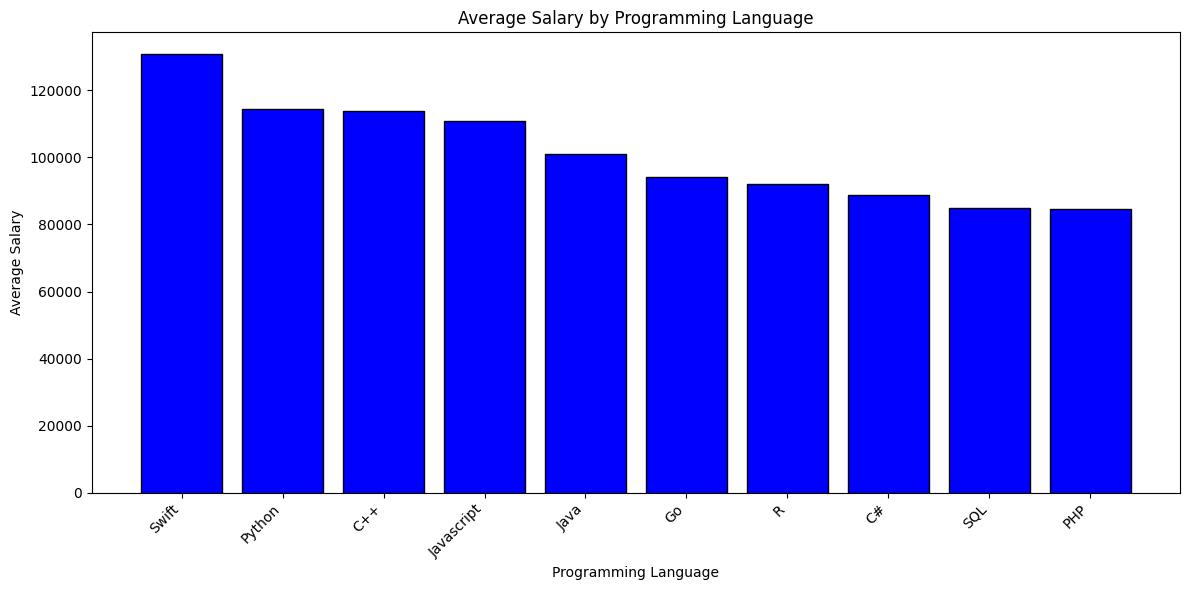

In [ ]:
df_sorted = df.sort_values(by='Average Salary', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_sorted['Language'], df_sorted['Average Salary'], color='blue', edgecolor='black')
plt.xlabel('Programming Language')
plt.ylabel('Average Salary')
plt.title('Average Salary by Programming Language')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()